In [2]:
import pandas as pd
import numpy as np 
import os

import matplotlib.pyplot as plt
import matplotlib.cm 
import matplotlib.colors
from matplotlib.patches import Patch
plt.rcParams['font.family'] = 'Arial'

from selenobot.files import FASTAFile
from sklearn.metrics import balanced_accuracy_score, confusion_matrix
import re
from tqdm import tqdm 

%load_ext autoreload
%autoreload 2

In [8]:
feature_types = ['len', 'aa_1mer', 'plm_esm', 'plm_pt5']

preds = dict()

test_results_df = pd.read_csv('../data/results/test.predict.csv', index_col=0)
val_results_df = pd.read_csv('../data/results/val.predict.csv', index_col=0)

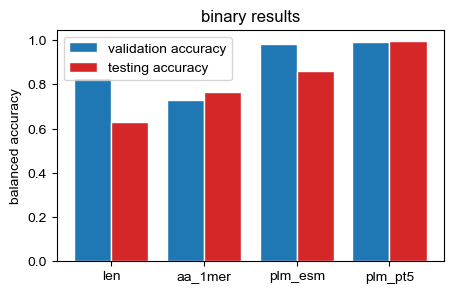

In [10]:
fig, ax = plt.subplots(figsize=(5, 3))

positions = np.arange(len(types)) + 1

val_accs, test_accs = [], []

for feature_type in feature_types:
    col = f'binary_model_{feature_type}_prediction'

    val_acc = balanced_accuracy_score(val_results_df.label.values, val_results_df[col].values)
    test_acc = balanced_accuracy_score(test_results_df.label.values, test_results_df[col].values)
    val_accs.append(val_acc)
    test_accs.append(test_acc)

bar_width = 0.4
ax.set_xticks(positions + 0.5 * bar_width, labels=types)
ax.set_title(f'binary results')
ax.set_ylabel('balanced accuracy')

ax.bar(positions, val_accs, width=bar_width, color='tab:blue', edgecolor='white')
ax.bar(positions + bar_width, test_accs, width=bar_width, color='tab:red', edgecolor='white')

ax.legend(['validation accuracy', 'testing accuracy'])

plt.show()
